In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

from HHModel import *

## Hodgkin-Huxley Model
### Introduction
* Created in 1952 to explain the ionic mechanisms underlying the initiation and propagation of action potentials in the squid giant axon, and they received the Nobel Prize in Physiology and Medicine for this work in 1963.
* Electrical model of action potentials in neurons.
* Set of 4 non-linear ODE's

<img src='pics\actionPotential.png'>


## System of Equations

### Nonlinear ODE's
\begin{equation}
I = C_m \frac{dV_m}{dt} + \bar{g}_K n^4\big( V_m - V_{K} \big) + \bar{g}_{Na} m^3 h \big( V_m - V_{Na} \big) + \bar{g}_L \big( V_m - V_L \big)\\ 
\frac{dn}{dt}= \alpha_n\big(V_m\big) \cdot \big(1 - n\big) - \beta_n\big(V_m \big) \cdot n \\
\frac{dm}{dt}= \alpha_m\big(V_m\big) \cdot \big(1 - m\big) - \beta_m\big(V_m \big) \cdot m \\
\frac{dh}{dt}= \alpha_h\big(V_m\big) \cdot \big(1 - h\big) - \beta_h\big(V_m \big) \cdot h \\
\end{equation}
### PDE
\begin{equation}
\frac{a}{2 R_2} \frac{\partial^2 V_m}{\partial x^2} = C_m \frac{dV_m}{dt} + \bar{g}_K n^4\big( V_m - V_{K} \big) + \bar{g}_{Na} m^3 h \big( V_m - V_{Na} \big) + \bar{g}_L \big( V_m - V_L \big)
\end{equation}
where,
* $Na$, $K$, $L$ are sodium, potassium and leakage channel subscripts ($i$-th ion channel)
* $I$ total current density, $I_i$ channel current density for the $i$-th ion channel
* $C_m$ membrane capacitance
* $V_m$ voltage across membrane,  $V_i$ channel voltage for the $i$-th ion channel
* $\alpha _{i}$ and $\beta _{i}$ are rate constants for the $i$-th ion channel
* $\bar{g}_{i}$ is the maximal value of the conductance for the $i$-th ion channel
* $n$, $m$, and $h$ are dimensionless quantities between 0 and 1 that are associated with potassium channel activation, sodium channel activation, and sodium channel inactivation, respectively
* $a$ axon fibre radius
* $R_2$ axoplasm specific resistance 

## Functions $\alpha$ and $\beta$ Voltage Dependant Coefficients
<img src='pics\apha_beta_functions.png'>
<img src='pics\coefficients.png' width='700'>

## PDE Equations
\begin{equation}
\frac{a}{2 R_2} \frac{\partial^2 V_m}{\partial x^2} = C_m \frac{dV_m}{dt} + \bar{g}_K n^4\big( V_m - V_{K} \big) + \bar{g}_{Na} m^3 h \big( V_m - V_{Na} \big) + \bar{g}_L \big( V_m - V_L \big)\\ 
\frac{dn}{dt}= \alpha_n\big(V_m\big) \cdot \big(1 - n\big) - \beta_n\big(V_m \big) \cdot n \\
\frac{dm}{dt}= \alpha_m\big(V_m\big) \cdot \big(1 - m\big) - \beta_m\big(V_m \big) \cdot m \\
\frac{dh}{dt}= \alpha_h\big(V_m\big) \cdot \big(1 - h\big) - \beta_h\big(V_m \big) \cdot h \\
\end{equation}

## Functions $\alpha$ and $\beta$ Voltage Dependant Coefficients
\begin{equation}
\alpha_n\big(V_m\big) = \frac{0.01 \cdot (V_m + 55)}{1 - exp\big(\frac{V_m + 55}{10} \big)}\\
\alpha_m\big(V_m\big) = \frac{0.1 \cdot (V_m + 40)}{1 - exp\big(\frac{-(V_m + 40)}{10} \big)} \\
\alpha_h\big(V_m\big) = 0.07 \cdot exp\bigg( \frac{-(V_m + 65)}{20} \bigg) \\
\end{equation}

\begin{equation}
\beta_n\big(V_m \big) = 0.125 \cdot exp\bigg( \frac{-(V_m + 65)}{80} \bigg) \\
\beta_m\big(V_m \big) = 4 \cdot exp\bigg( \frac{-(V_m + 65)}{18} \bigg) \\
\beta_h\big(V_m \big) = \bigg( 1 + exp\big( \frac{-(V_m+35)}{10} \big)\bigg)^{(-1)} \\
\end{equation}

| Parameters Used     | Capacitance<br> [uF/cm^2] | $V_i$ <br>[mV] | $\bar{g}_i$<br>[mS/cm^2] | Initial Values |
|---------------------|---------------------------|----------------|--------------------------|----------------|
| Membrane            | 1.0                       | --             | --                       | $V_m = -65$    |
| Potassium Channel   | --                        | -77.0          | 0.5                      | $n = 0.32$     |
| Sodium Activation   | --                        | 50.0           | 120.0                    | $m = 0.05$     |
| Sodium Deactivation | --                        | 50.0           | 120.0                    | $h = 0.6$      |
| Leakage Channel     | --                        | -54.387        | 0.3                      | --             |

In [4]:
'''Build Model Object'''
hhm = HHModel() # build model object with default parameters

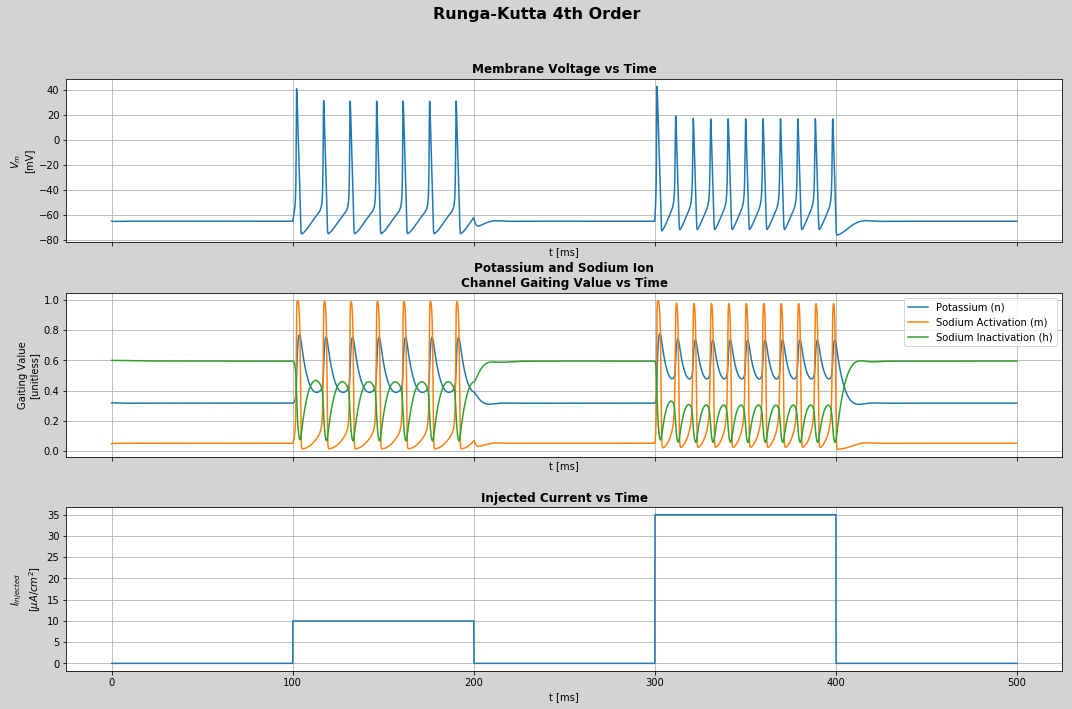

In [5]:
"""Solve equations"""
t = np.arange(0,500,0.05)
Y = hhm.simulate(t)
hhm.plotSolution('Runga-Kutta 4th Order',Y,t)

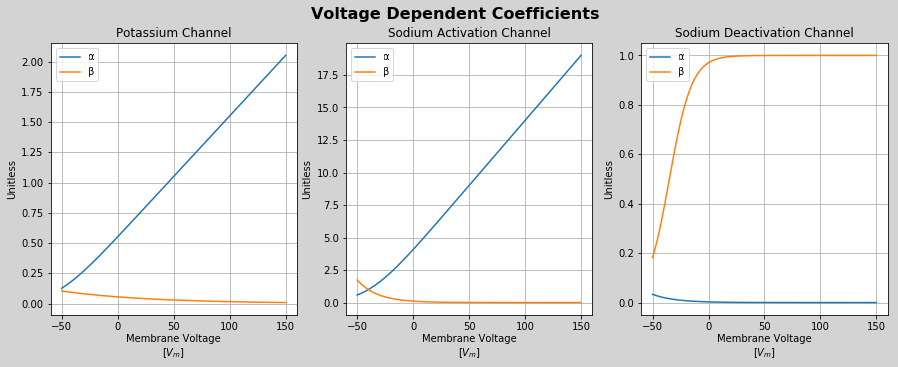

In [6]:
'''Plot Coefficients vs Voltage'''
coeffs = [(hhm.alpha_n, hhm.beta_n),
         (hhm.alpha_m, hhm.beta_m),
         (hhm.alpha_h, hhm.beta_h)]
titles = ['Potassium Channel',
         'Sodium Activation Channel',
         'Sodium Deactivation Channel']
vm = np.linspace(-50,150,200)
fig, axes = plt.subplots(1, 3, facecolor='#d3d3d3', figsize=(15,5))
fig.suptitle('Voltage Dependent Coefficients',fontweight='bold', fontsize=16)
axes = axes.ravel()

for i,ax in enumerate(axes):
    lbl = ['\u03B1','\u03B2'] # alpha and beta
    for j,coef in enumerate(coeffs[i]):
        ax.plot(vm,coef(vm),label=lbl[j])
    ax.set_title(titles[i])
    ax.grid(True)
    ax.legend(loc='best')
    ax.set_ylabel('Unitless')
    ax.set_xlabel('Membrane Voltage\n[$V_m$]')
    

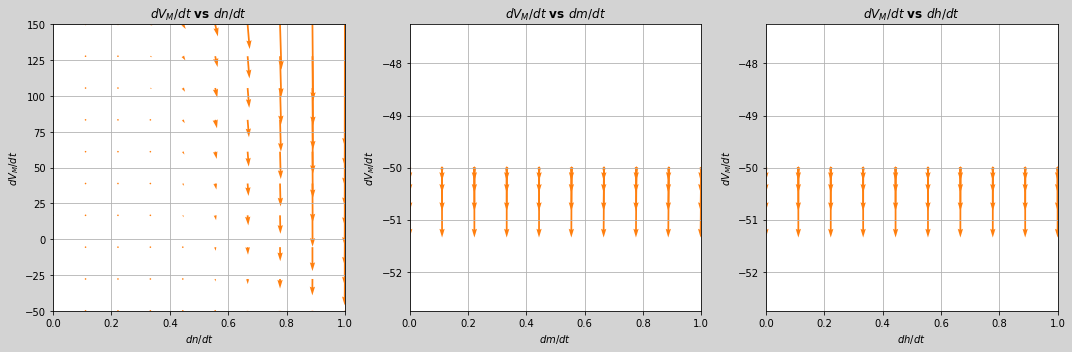

In [7]:
''' Investigate Phase Plane'''
S = ((-50,150.),(0,1.),(0,1.),(0,1.)) # Span for Vm, n, m ,h
Np = 10 # number of points in span 
XY,xy = hhm.vectorField(S,Np)
hhm.plotVectorField(XY,xy)


In [34]:
"""Solve equations"""
t = np.arange(0,30,0.01)
Y = hhm.simulate(t,I_funct=hhm.I_spike)
Ye = hhm.simulate(t,method='forwardEuler',I_funct=hhm.I_spike)
Yh = hhm.simulate(t,method='heunsMethod',I_funct=hhm.I_spike)

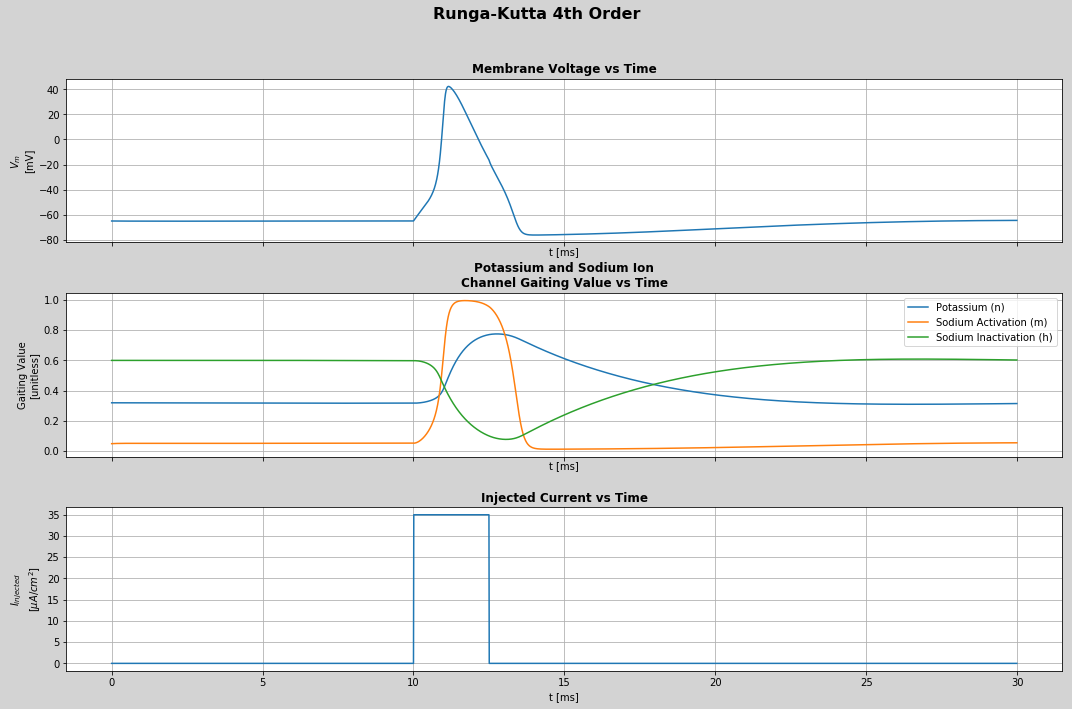

In [35]:
hhm.plotSolution('Runga-Kutta 4th Order',Y,t,I_funct=hhm.I_spike)

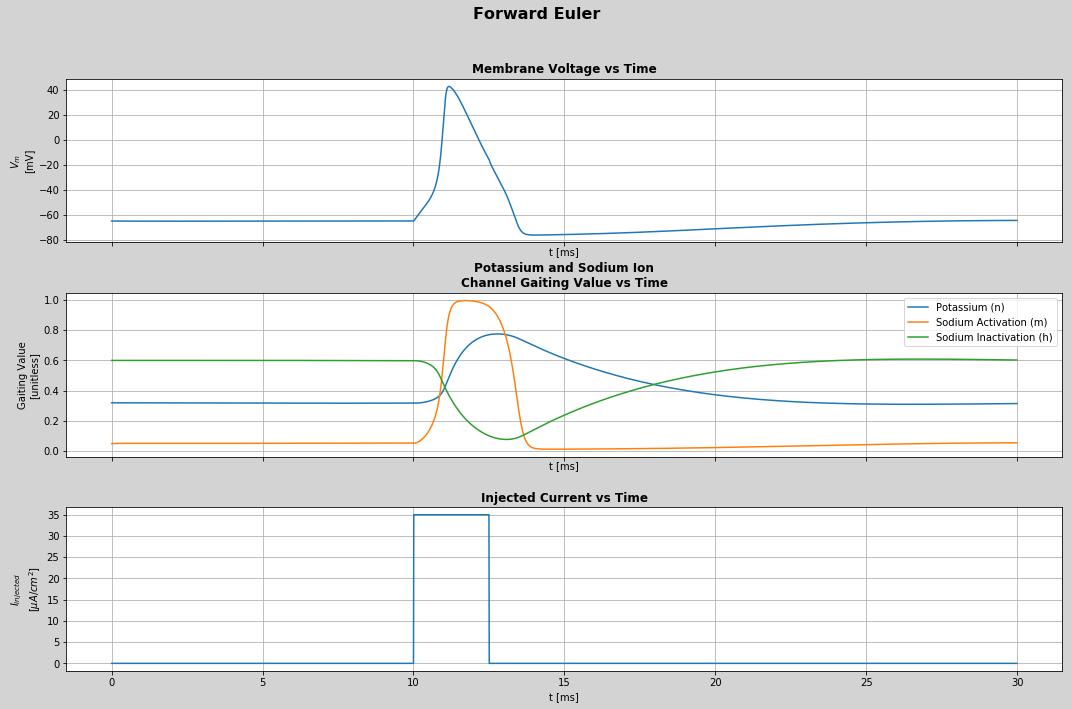

In [36]:
hhm.plotSolution('Forward Euler',Ye,t,I_funct=hhm.I_spike)

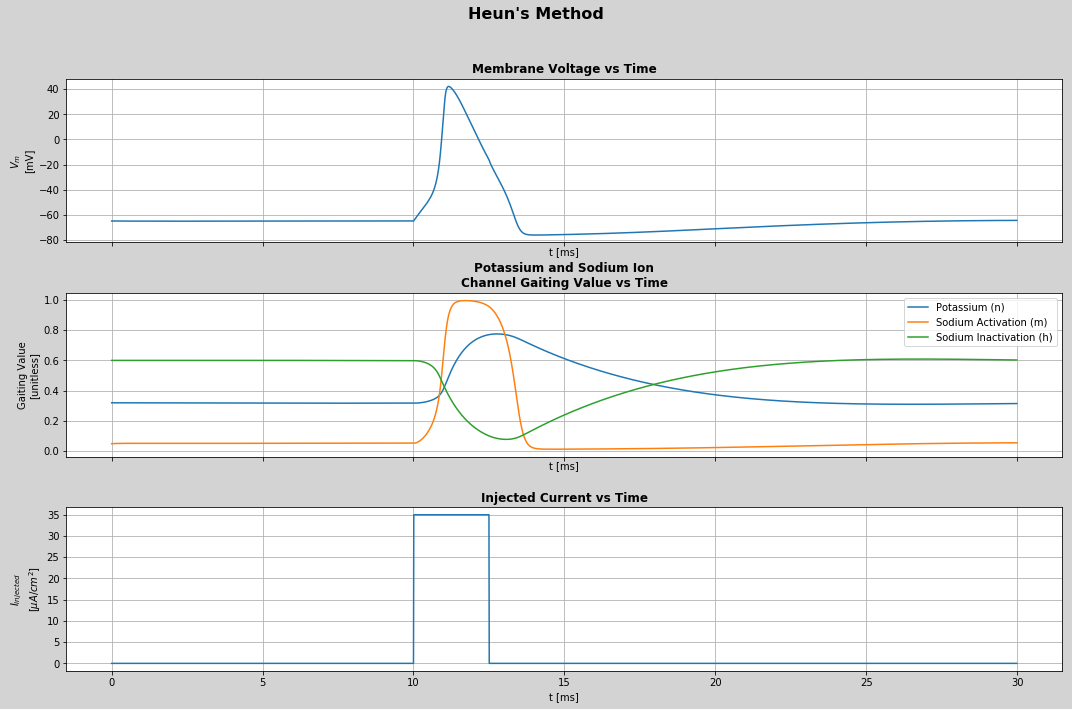

In [37]:
hhm.plotSolution('Heun\'s Method',Yh,t,I_funct=hhm.I_spike)

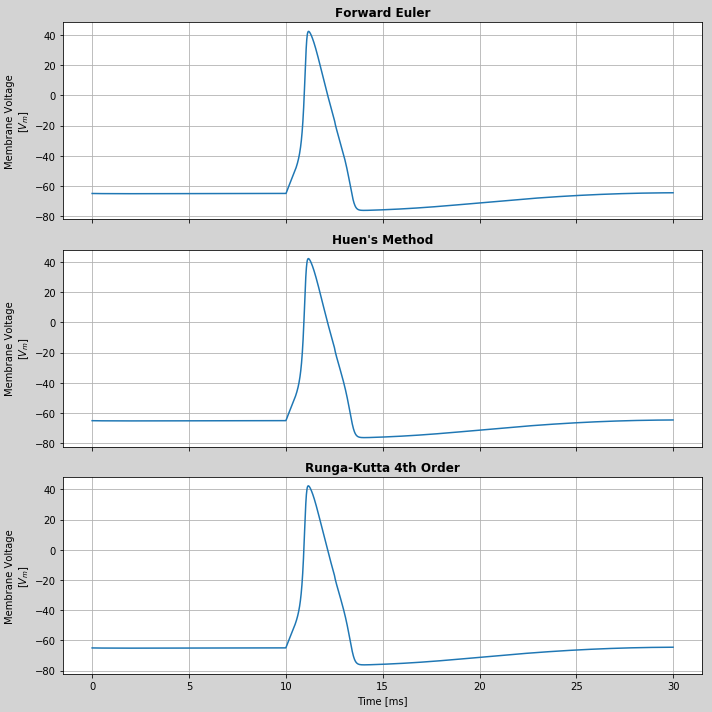

In [38]:
'''Plot Coefficients vs Voltage'''
simulations = [Ye,Yh,Y]
titles = ['Forward Euler',
         'Huen\'s Method',
         'Runga-Kutta 4th Order']
fig, axes = plt.subplots(3, 1, facecolor='#d3d3d3', figsize=(10,10),sharex=True,
                        tight_layout = True)
#fig.suptitle('Simulations with Time Step of 10 ms',fontweight='bold', fontsize=16)
axes = axes.ravel()

for i,ax in enumerate(axes):
    ax.plot(t,simulations[i][0,:])
    ax.set_title(titles[i],fontweight='bold')
    ax.grid(True)
    ax.set_ylabel('Membrane Voltage\n[$V_m$]')
    if i == 2:
        ax.set_xlabel('Time [ms]')

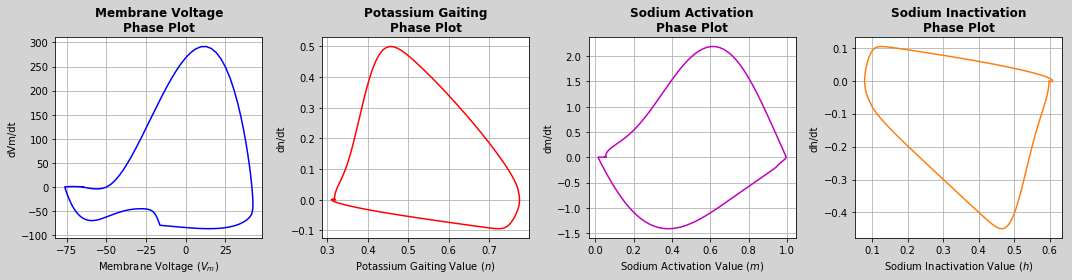

In [39]:
PPrk = hhm.phasePlane(Y,t)
hhm.plotPhasePlane(Y,PPrk)

### Error for varied Step Size

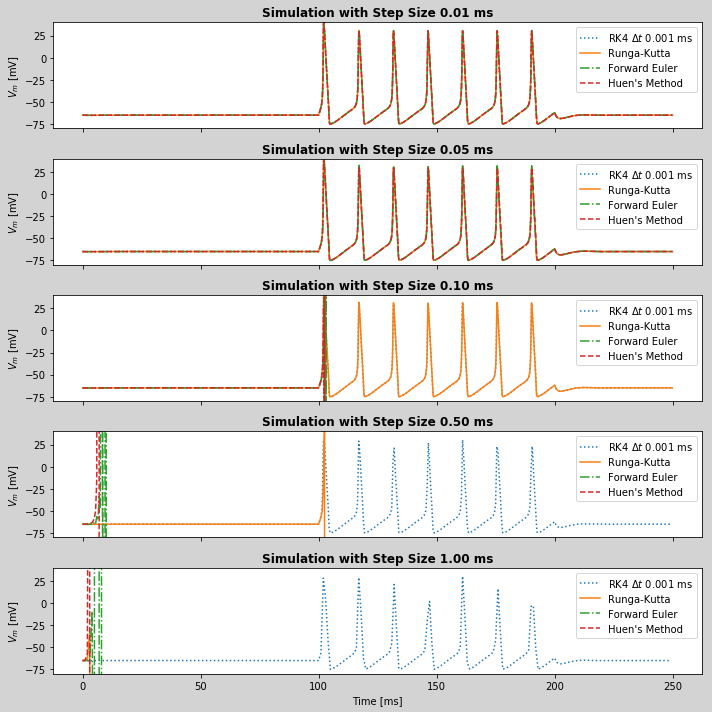

In [40]:
def RMSE(y1,y2):
    n = np.size(y1)
    rmse = (y1 - y2)
    rmse = np.sum(rmse*rmse)/n
    rmse = np.sqrt(rmse)
    return rmse

err = [[],[],[]]
tend = 250
step_sizes = [0.01,0.05,0.1,0.5,1]
sims = [lambda t: hhm.simulate(t)[0,:],
       lambda t: hhm.simulate(t,method='forwardEuler')[0,:],
       lambda t: hhm.simulate(t,method='heunsMethod')[0,:]]
lbls = ['Runga-Kutta','Forward Euler','Huen\'s Method']
markers = ['-','-.','--']

# use RK4 0.001 as comparison
t = np.arange(0,tend,0.001)
comparison = interp1d(t, hhm.simulate(t)[0,:], kind='cubic')
fig, axes = plt.subplots(len(step_sizes), 1, facecolor='#d3d3d3', figsize=(10,10),sharex=True,
                        tight_layout = True)
axes = axes.ravel()
for i,step_size in enumerate(step_sizes):
    """Solve equations"""
    t = np.arange(0,tend,step_size)
    # get interpolation from comparison simulation
    comp = comparison(t)
    axes[i].plot(t,comp,':',label='RK4 $\Delta t$ 0.001 ms')
    for j,sim in enumerate(sims):
        y = sim(t)
        err[j].append(RMSE(y,comp))
        axes[i].plot(t,sim(t),markers[j],label=lbls[j])
    
    axes[i].set_title('Simulation with Step Size {:0.2f} ms'.format(step_size),
                     fontweight='bold')
    axes[i].legend(loc='best')
    axes[i].set_ylim(-80,40)
    axes[i].set_ylabel('$V_m$ [mV]')
    if i == len(step_sizes) - 1:
        axes[i].set_xlabel('Time [ms]')

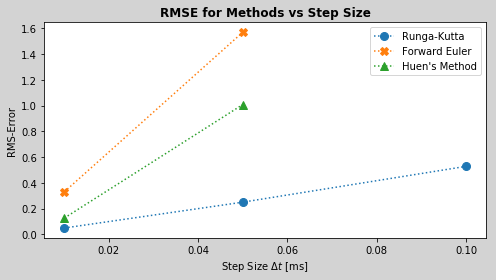

In [41]:
'''Graph Error from First Simulation Runs'''
fig, ax = plt.subplots(1, 1, facecolor='#d3d3d3', figsize=(7,4),sharex=True,
                        tight_layout = True)

lbls = ['Runga-Kutta','Forward Euler','Huen\'s Method']
markers = [':o',':X',':^']
for i in range(len(err)):
    ax.plot(step_sizes,err[i],markers[i],label=lbls[i],markersize=8)
ax.legend(loc='best')

ax.set_ylabel('RMS-Error')
ax.set_xlabel('Step Size $\Delta t$ [ms]')
_ = ax.set_title('RMSE for Methods vs Step Size',
            fontweight='bold')        

In [42]:
'''Perform higher resolution test on RMSE'''
err2 = [[],[],[]]
step_sizes2 = np.linspace(0.005,0.05,10)


for i,step_size in enumerate(step_sizes2):
    """Solve equations"""
    t = np.arange(0,tend,step_size)
    # get interpolation from comparison simulation
    comp = comparison(t)
    for j,sim in enumerate(sims):
        y = sim(t)
        err2[j].append(RMSE(y,comp))

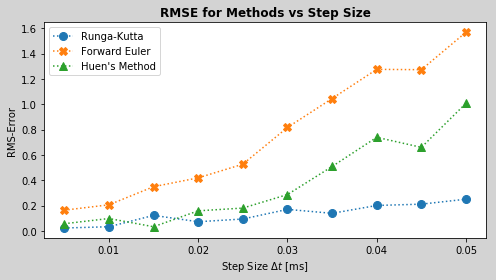

In [43]:
'''Graph Error from Higher Resolution Simulation Runs'''
fig, ax = plt.subplots(1, 1, facecolor='#d3d3d3', figsize=(7,4),sharex=True,
                        tight_layout = True)
lbls = ['Runga-Kutta','Forward Euler','Huen\'s Method']
markers = [':o',':X',':^']

for i in range(len(err2)):
    ax.plot(step_sizes2,err2[i],markers[i],label=lbls[i],markersize=8)
ax.legend(loc='best')

ax.set_ylabel('RMS-Error')
ax.set_xlabel('Step Size $\Delta t$ [ms]')
_ = ax.set_title('RMSE for Methods vs Step Size',
            fontweight='bold')   

In [44]:
"""Solve equations"""
t = np.arange(0,500,0.05)
Y = hhm.simulate(t)
Ye = hhm.simulate(t,method='forwardEuler')
Yh = hhm.simulate(t,method='heunsMethod')

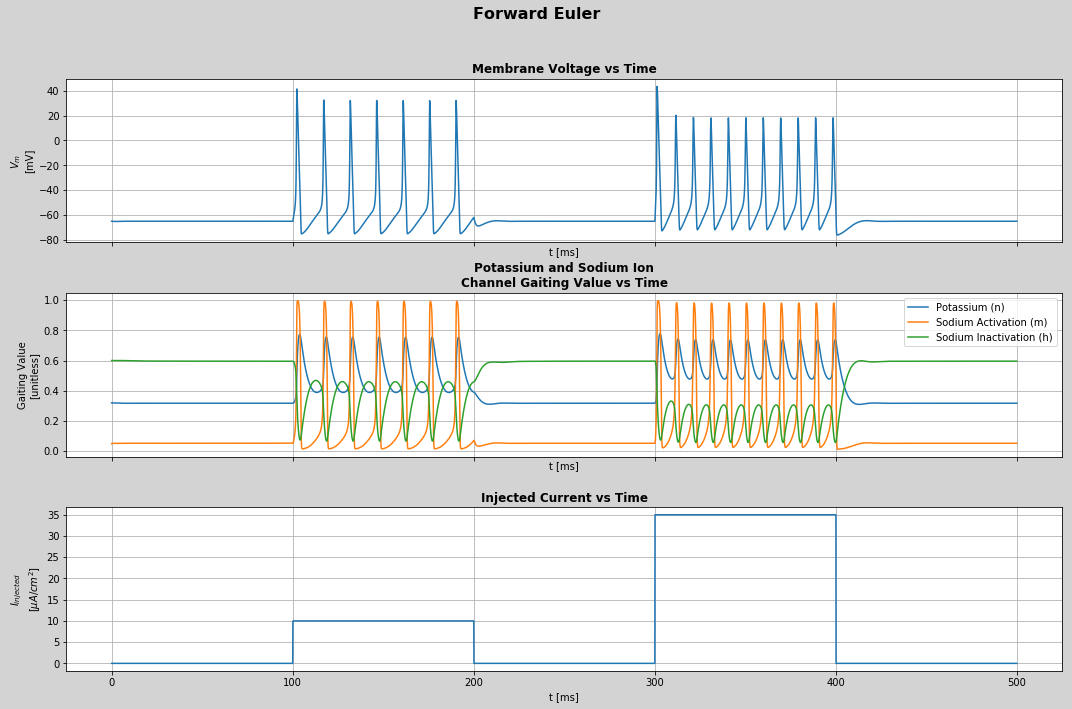

In [45]:
hhm.plotSolution('Forward Euler',Ye,t)

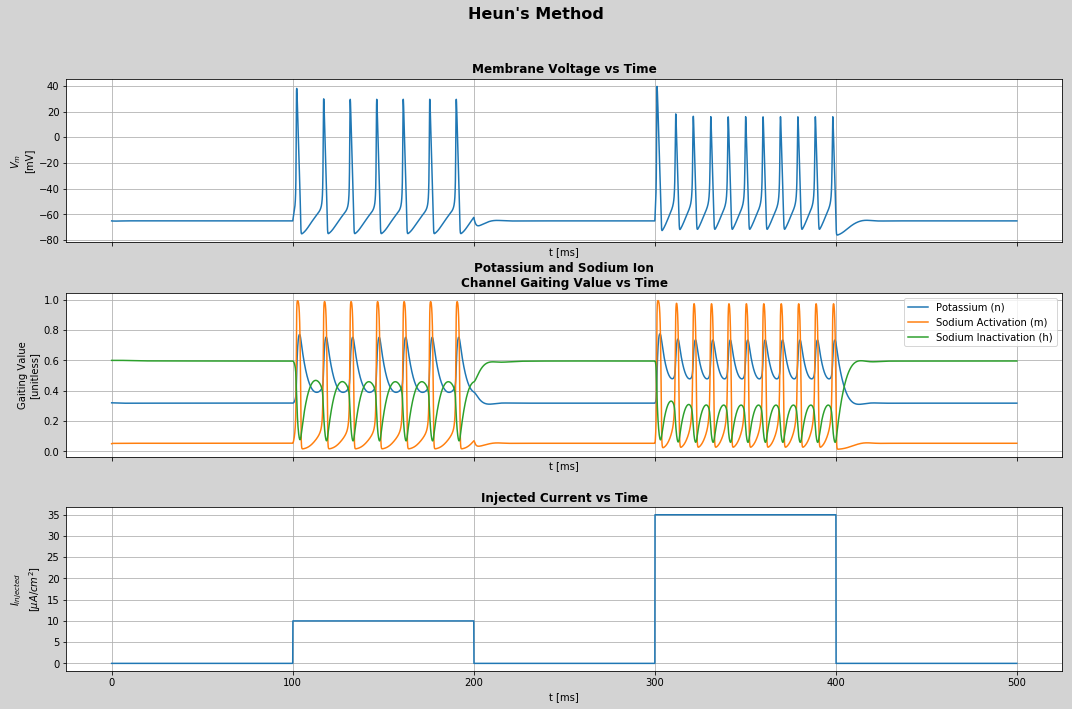

In [46]:
hhm.plotSolution('Heun\'s Method',Yh,t)

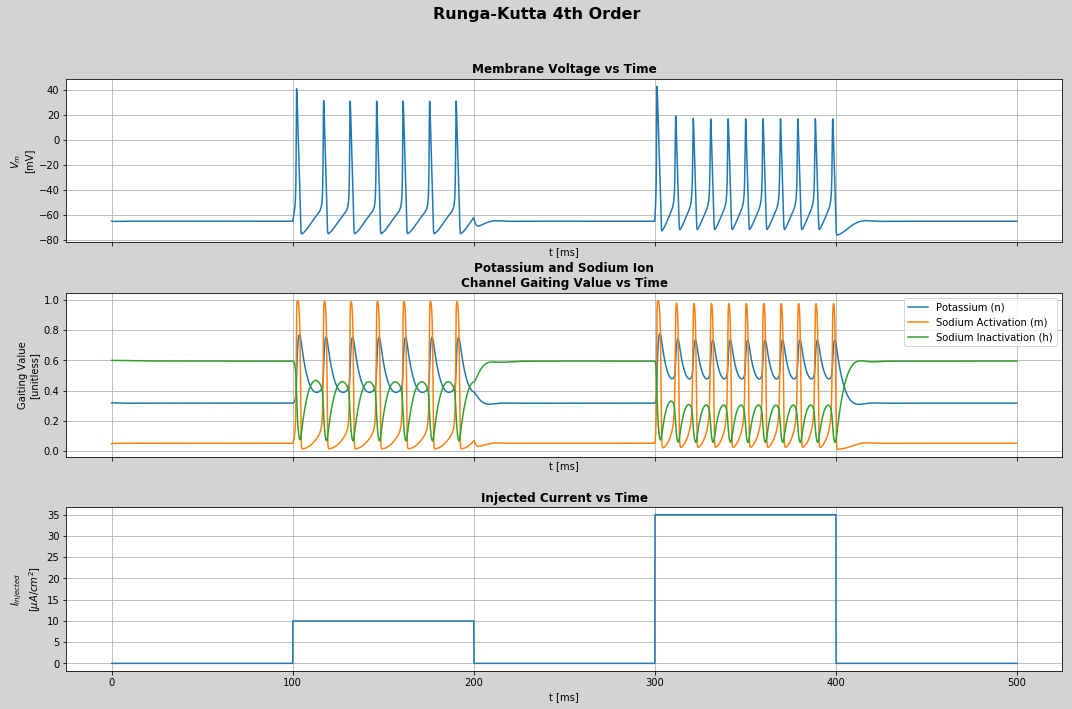

In [47]:

hhm.plotSolution('Runga-Kutta 4th Order',Y,t)